<a href="https://colab.research.google.com/github/chrsthper/PBA_Christhoper-Pangaribuan-NBA_App/blob/main/Week2_Scrapping_Apps_Review_NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Scrapping Google Apps Review - eg NBA
Week 2 NLP Pipeline PBA/ Genap 2025/ Irmasari Hafidz irma@its.ac.id

In [1]:
!pip install google_play_scraper
!pip install textblob
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.7 MB/s eta 0:00:00


In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

In [3]:
#Android App NBA from Google Play at
#https://play.google.com/store/apps/details?id=com.runbuddy.prod&pcampaignid=web_share
#The apps ID found in the link after id=com.runbuddy.prod
#The apps name on Google Play titled: nba: Running Plans & Coach
#Dated 6 March 2025 and N of reviews 7,2k

from google_play_scraper import app, Sort, reviews_all

nba_reviews = reviews_all(
    'com.nbaimd.gametime.nba2011',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [4]:
#Save NBA reviews into dataframe
df_nbarev = pd.DataFrame(np.array(nba_reviews),columns=['content'])
df_nbarev = df_nbarev.join(pd.DataFrame(df_nbarev.pop('content').tolist()))
df_nbarev.to_csv(r'df_nbarev', index=False)

In [5]:
df_nbarev

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0796ba82-e316-4727-ae96-09bea7f1c045,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,if I press countine creating account it said e...,1,0,0.59.0.20250214210937,2025-03-11 04:49:23,We are sorry for the inconvenience and that yo...,2025-03-11 15:03:10,0.59.0.20250214210937
1,67ee485e-d51a-44cd-94a4-401f883778fc,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Video quality is inconsistent and usually bad,...",1,1,0.59.0,2025-03-11 04:25:48,We are sorry you are having issues with the ap...,2025-03-11 15:04:20,0.59.0
2,bd7b7f73-8261-4652-8bb7-26e3de738690,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I like the new tablet optimizations but expand...,3,0,0.59.0.20250214210937,2025-03-11 04:21:48,We are sorry for the trouble and that you are ...,2025-03-11 01:13:25,0.59.0.20250214210937
3,b25934b1-afd4-4c71-9df3-e69bb18cce3a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Coming back to give another negative review. I...,1,5,0.59.0,2025-03-11 01:01:07,"We are really sorry the app is crashing, Eric....",2023-02-03 01:18:23,0.59.0
4,e2cb25d3-30dc-4037-9e8c-4705d1ca65a5,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,nice,4,0,None,2025-03-11 00:37:20,Thank you for the kind words and 5-star review...,2025-03-11 01:04:39,None
...,...,...,...,...,...,...,...,...,...,...,...
24044,cdd6b19c-718f-4f9e-a731-b992ebbfe594,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Video is awesome, but unable to log in as only...",4,2,3.1223,2011-12-24 21:06:38,None,NaT,3.1223
24045,027eddff-cca2-4dd7-99ac-e8c6abdcdc46,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Downloaded the app onto my Huawei 7-inch table...,3,3,3.1223,2011-12-24 15:54:24,None,NaT,3.1223
24046,02e5c1c7-ce20-4c85-ac42-a1fbd56aaeef,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I've purchased league pass / NBA.TV already an...,2,1,3.1223,2011-12-24 12:40:55,None,NaT,3.1223
24047,a123dc85-0135-448a-a055-884a71830085,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Can't wait for the season to start!,5,0,3.1223,2011-12-24 07:49:12,None,NaT,3.1223


In [6]:
df_nbarev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24049 entries, 0 to 24048
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              24049 non-null  object        
 1   userName              24049 non-null  object        
 2   userImage             24049 non-null  object        
 3   content               23983 non-null  object        
 4   score                 24049 non-null  int64         
 5   thumbsUpCount         24049 non-null  int64         
 6   reviewCreatedVersion  18108 non-null  object        
 7   at                    24049 non-null  datetime64[ns]
 8   replyContent          16328 non-null  object        
 9   repliedAt             16328 non-null  datetime64[ns]
 10  appVersion            18108 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 2.0+ MB


In [7]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
df_nbarev.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,if I press countine creating account it said e...,1,0,0.59.0.20250214210937,2025-03-11 04:49:23,We are sorry for the inconvenience and that yo...,2025-03-11 15:03:10
1,"Video quality is inconsistent and usually bad,...",1,1,0.59.0,2025-03-11 04:25:48,We are sorry you are having issues with the ap...,2025-03-11 15:04:20
2,I like the new tablet optimizations but expand...,3,0,0.59.0.20250214210937,2025-03-11 04:21:48,We are sorry for the trouble and that you are ...,2025-03-11 01:13:25
3,Coming back to give another negative review. I...,1,5,0.59.0,2025-03-11 01:01:07,"We are really sorry the app is crashing, Eric....",2023-02-03 01:18:23
4,nice,4,0,None,2025-03-11 00:37:20,Thank you for the kind words and 5-star review...,2025-03-11 01:04:39
...,...,...,...,...,...,...,...
24044,"Video is awesome, but unable to log in as only...",4,2,3.1223,2011-12-24 21:06:38,None,NaT
24045,Downloaded the app onto my Huawei 7-inch table...,3,3,3.1223,2011-12-24 15:54:24,None,NaT
24046,I've purchased league pass / NBA.TV already an...,2,1,3.1223,2011-12-24 12:40:55,None,NaT
24047,Can't wait for the season to start!,5,0,3.1223,2011-12-24 07:49:12,None,NaT


In [8]:
#Check number of reviews scores
df_nbarev['score'].value_counts()

,count
score,
1,9557
5,9269
2,1932
4,1756
3,1535


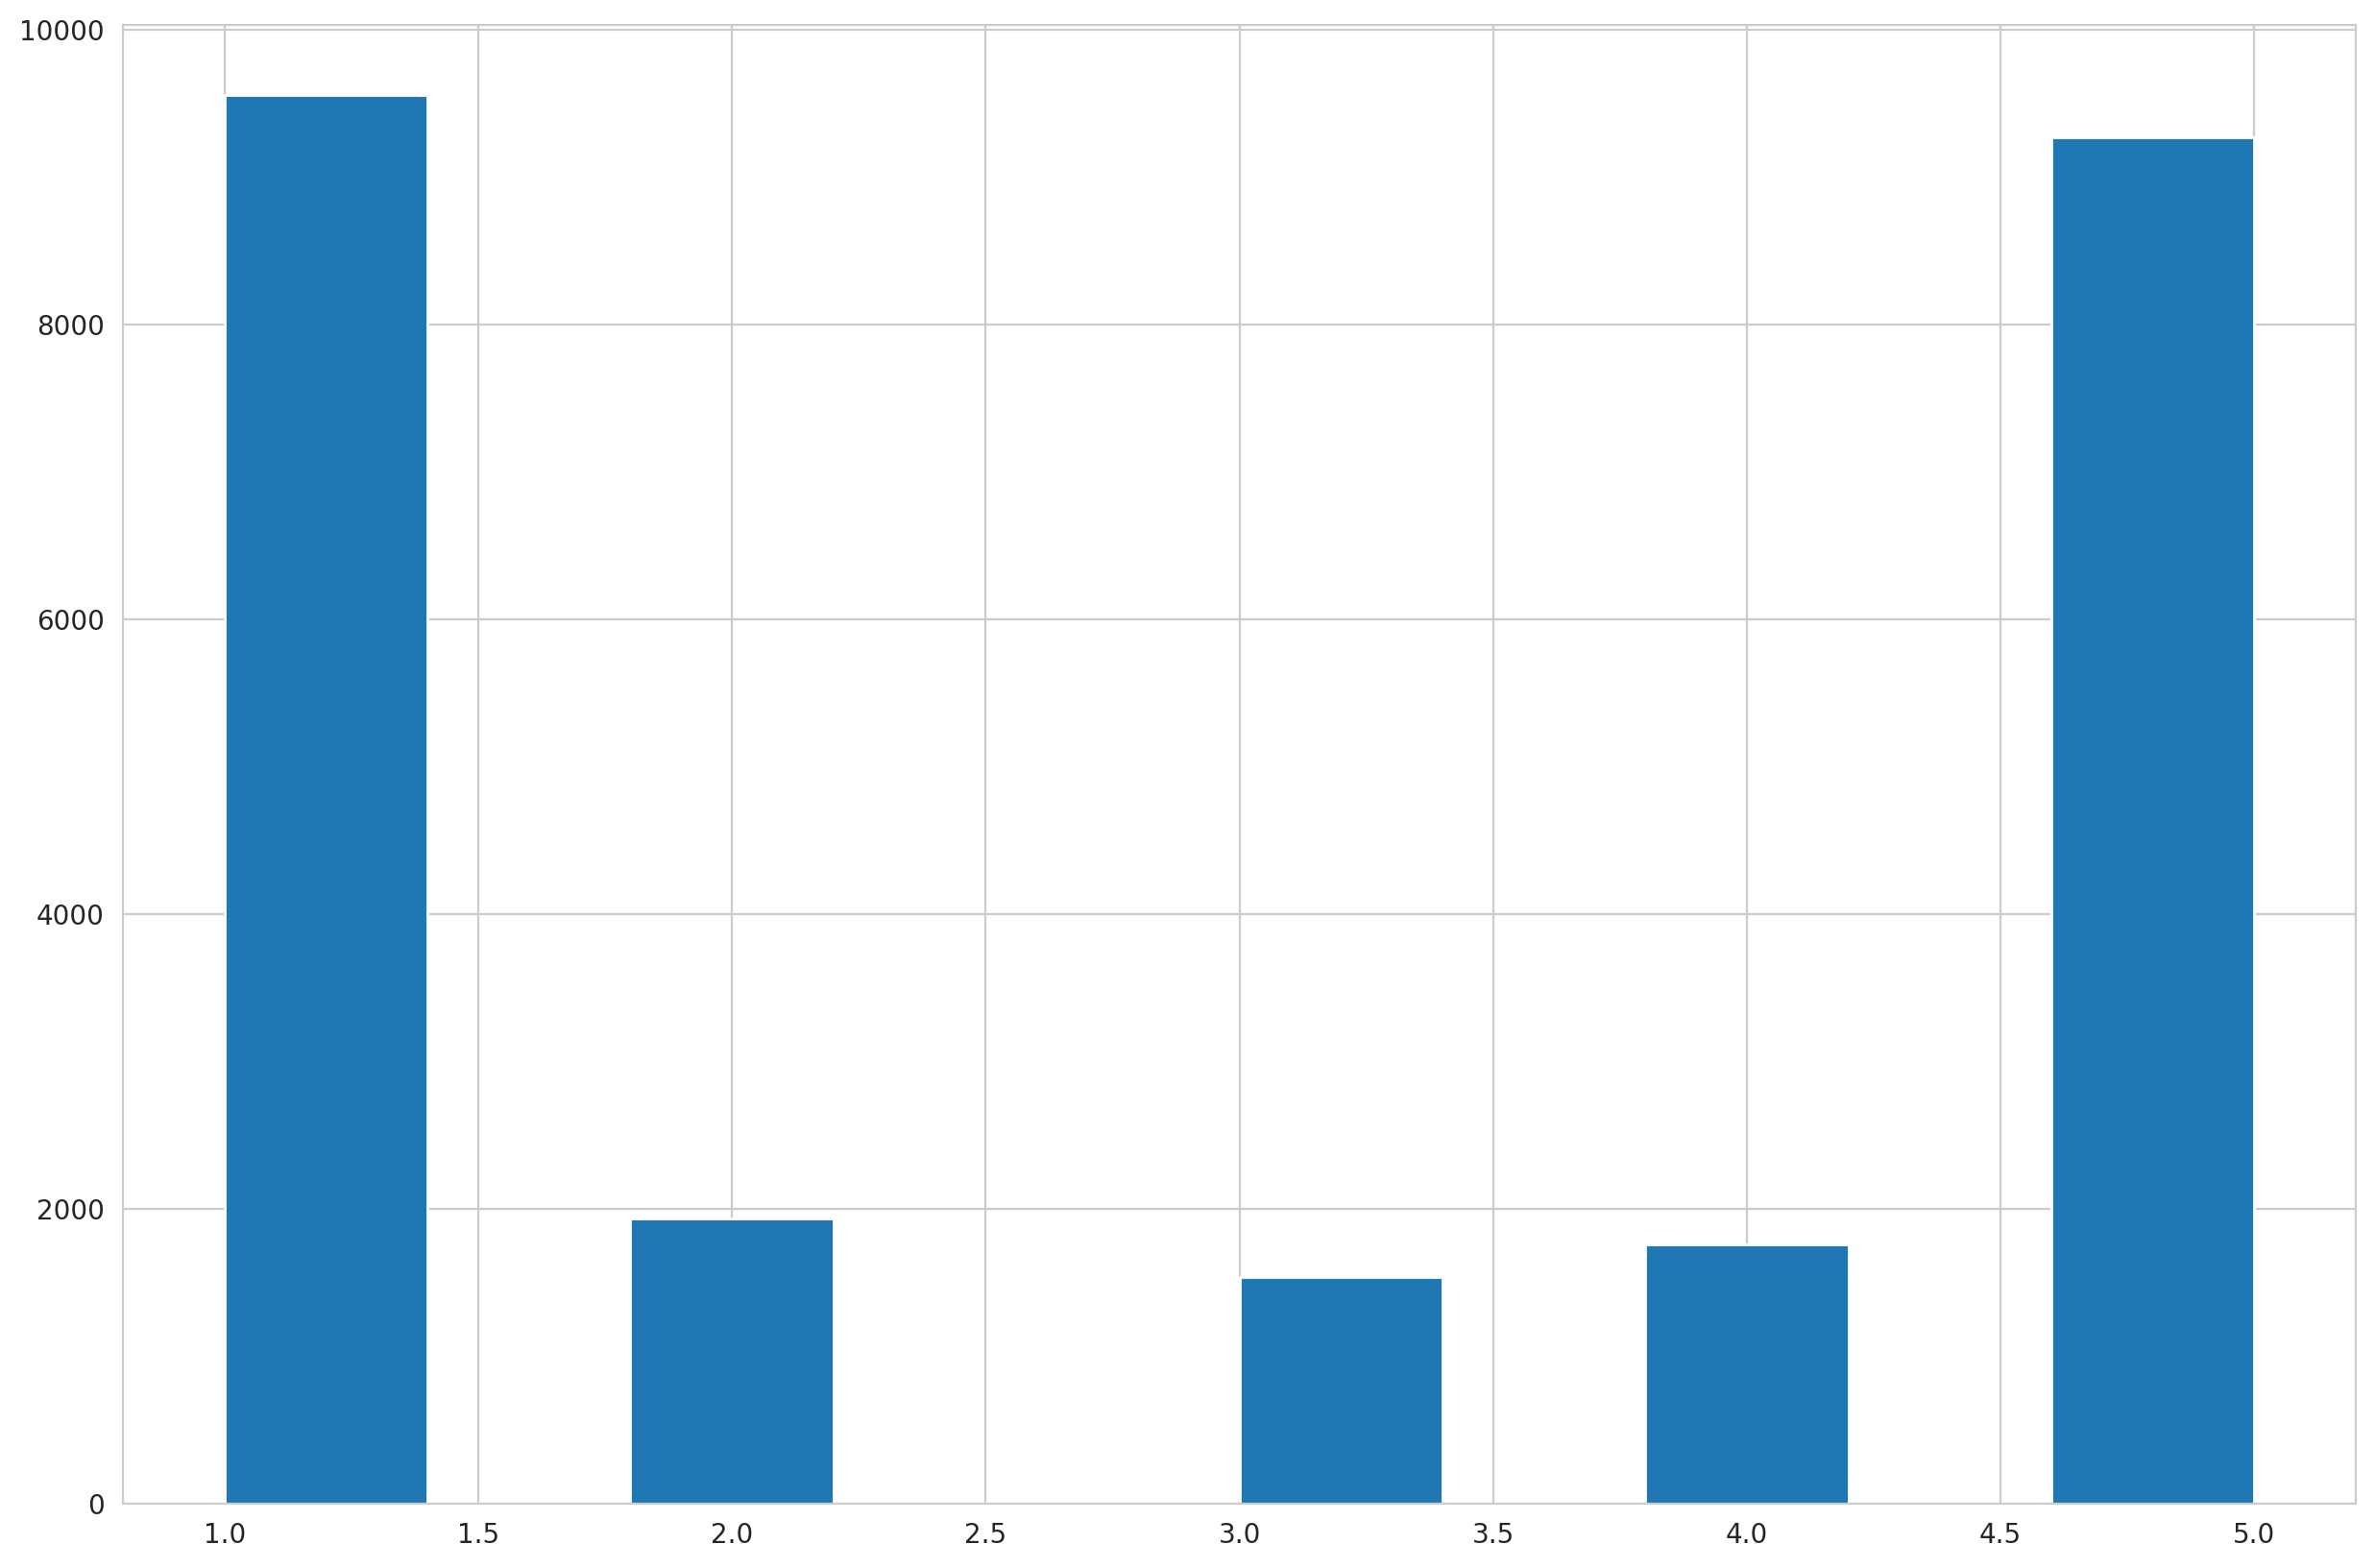

In [9]:
plt.hist(df_nbarev['score'])
plt.show()

In [10]:
!pip install emoji

import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)
#from pandas_profiling import ProfileReport
import regex
import nltk
import wordcloud
import textblob

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import string
import re
import emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.6 MB/s eta 0:00:00


In [11]:
#Creating polarity on the column: content (review from the apps) using TextBlob
#Read https://textblob.readthedocs.io/en/dev/quickstart.html

from textblob import TextBlob
# Handle None values in 'content' column by replacing them with empty strings
df_nbarev['sentiment_polarity'] = df_nbarev['content'].astype(str).apply(lambda x: TextBlob(x).polarity)
df_nbarev['sentiment_subjective'] = df_nbarev['content'].astype(str).apply(lambda x: TextBlob(x).subjectivity)

In [12]:
df_nbarev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective"]]

,content,score,sentiment_polarity,sentiment_subjective
0,if I press countine creating account it said error,1,0.000000,0.000000
1,"Video quality is inconsistent and usually bad, have to load video multiple times or app locks up, audio doesn't work half the time, takes forever to load videos,sometimes starts games at the begin...",1,-0.182576,0.333333
2,I like the new tablet optimizations but expanding the window full size does not work consistently or is incorrectly sized by usually being too zoomed in on my Pixel Tablet.,3,0.121591,0.376136
3,Coming back to give another negative review. I find it very hard to believe that the rating for this app is above a 2 star. The app owners have obviously add fake reviews to prop up the total scor...,1,-0.314236,0.538542
4,nice,4,0.600000,1.000000
...,...,...,...,...
24044,"Video is awesome, but unable to log in as only shows username field.",4,0.166667,0.833333
24045,"Downloaded the app onto my Huawei 7-inch table. But when I went to log in onto my NBA account the page could not show up fully, and I could only see the USERNAME box. Hope this is fixed soon, th...",3,0.033333,0.433333
24046,I've purchased league pass / NBA.TV already and ive been impatiently waiting for the app. I've got high hopes it will meet expectations later but right now it misses the mark. Not optimized for my...,2,0.149143,0.495143
24047,Can't wait for the season to start!,5,0.000000,0.000000


## Lowercasing

In [13]:
#DATA PREPROCESSING
# Lower casing
# Change the reviews type to string
df_nbarev['content'] = df_nbarev['content'].astype(str)# Before lowercasing
# Before lowercasing
print(df_nbarev['content'][188])
print(df_nbarev['content'][1])
print(df_nbarev['content'][689])

Thieves. They farm out geolocation to a third party so you get fked over unless you have a static IP. So I can still watch games on my mobile (cell data), but can't use my home wi-fi. Every year I swear I won't subscribe again but this time it's a done deal. There are too many alternatives available to put up with shoddy "premium" service.
Video quality is inconsistent and usually bad, have to load video multiple times or app locks up, audio doesn't work half the time, takes forever to load videos,sometimes starts games at the beginning, sometimes starts games live, takes forever to switch between games.
Best NBA Ever


In [14]:
#Lowercase all reviews to see the difference
df_nbarev['content']= df_nbarev['content'].apply(lambda x: x.lower())
print(df_nbarev['content'][188])
print(df_nbarev['content'][1])
print(df_nbarev['content'][689])

thieves. they farm out geolocation to a third party so you get fked over unless you have a static ip. so i can still watch games on my mobile (cell data), but can't use my home wi-fi. every year i swear i won't subscribe again but this time it's a done deal. there are too many alternatives available to put up with shoddy "premium" service.
video quality is inconsistent and usually bad, have to load video multiple times or app locks up, audio doesn't work half the time, takes forever to load videos,sometimes starts games at the beginning, sometimes starts games live, takes forever to switch between games.
best nba ever


##Stopwords Removal
English Stopwords

In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get English stopwords
english_stopwords = stopwords.words('english')

# Display first 20 stopwords
print(english_stopwords[:20])

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
#edited from https://www.tensorscience.com/nlp/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products
import string

df_nbarev['wordCount'] = [len(review.split()) for review in df_nbarev['content']]
df_nbarev['uppercaseCharCount'] = [sum(char.isupper() for char in review) \
                              for review in df_nbarev['content']]
df_nbarev['specialCharCount'] = [sum(char in string.punctuation for char in review) \
                            for review in df_nbarev['content']]

In [17]:
df_nbarev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","wordCount","uppercaseCharCount","specialCharCount"]]

,content,score,sentiment_polarity,sentiment_subjective,wordCount,uppercaseCharCount,specialCharCount
0,if i press countine creating account it said error,1,0.000000,0.000000,9,0,0
1,"video quality is inconsistent and usually bad, have to load video multiple times or app locks up, audio doesn't work half the time, takes forever to load videos,sometimes starts games at the begin...",1,-0.182576,0.333333,43,0,8
2,i like the new tablet optimizations but expanding the window full size does not work consistently or is incorrectly sized by usually being too zoomed in on my pixel tablet.,3,0.121591,0.376136,30,0,1
3,coming back to give another negative review. i find it very hard to believe that the rating for this app is above a 2 star. the app owners have obviously add fake reviews to prop up the total scor...,1,-0.314236,0.538542,74,0,7
4,nice,4,0.600000,1.000000,1,0,0
...,...,...,...,...,...,...,...
24044,"video is awesome, but unable to log in as only shows username field.",4,0.166667,0.833333,13,0,2
24045,"downloaded the app onto my huawei 7-inch table. but when i went to log in onto my nba account the page could not show up fully, and i could only see the username box. hope this is fixed soon, th...",3,0.033333,0.433333,48,0,6
24046,i've purchased league pass / nba.tv already and ive been impatiently waiting for the app. i've got high hopes it will meet expectations later but right now it misses the mark. not optimized for my...,2,0.149143,0.495143,59,0,12
24047,can't wait for the season to start!,5,0.000000,0.000000,7,0,2


In [18]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df_nbarev['sentiment_rating'] = df_nbarev['score'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [19]:
df_nbarev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,if i press countine creating account it said error,1,0.000000,0.000000,Negative
1,"video quality is inconsistent and usually bad, have to load video multiple times or app locks up, audio doesn't work half the time, takes forever to load videos,sometimes starts games at the begin...",1,-0.182576,0.333333,Negative
2,i like the new tablet optimizations but expanding the window full size does not work consistently or is incorrectly sized by usually being too zoomed in on my pixel tablet.,3,0.121591,0.376136,Neutral
3,coming back to give another negative review. i find it very hard to believe that the rating for this app is above a 2 star. the app owners have obviously add fake reviews to prop up the total scor...,1,-0.314236,0.538542,Negative
4,nice,4,0.600000,1.000000,Positive
...,...,...,...,...,...
24044,"video is awesome, but unable to log in as only shows username field.",4,0.166667,0.833333,Positive
24045,"downloaded the app onto my huawei 7-inch table. but when i went to log in onto my nba account the page could not show up fully, and i could only see the username box. hope this is fixed soon, th...",3,0.033333,0.433333,Neutral
24046,i've purchased league pass / nba.tv already and ive been impatiently waiting for the app. i've got high hopes it will meet expectations later but right now it misses the mark. not optimized for my...,2,0.149143,0.495143,Negative
24047,can't wait for the season to start!,5,0.000000,0.000000,Positive


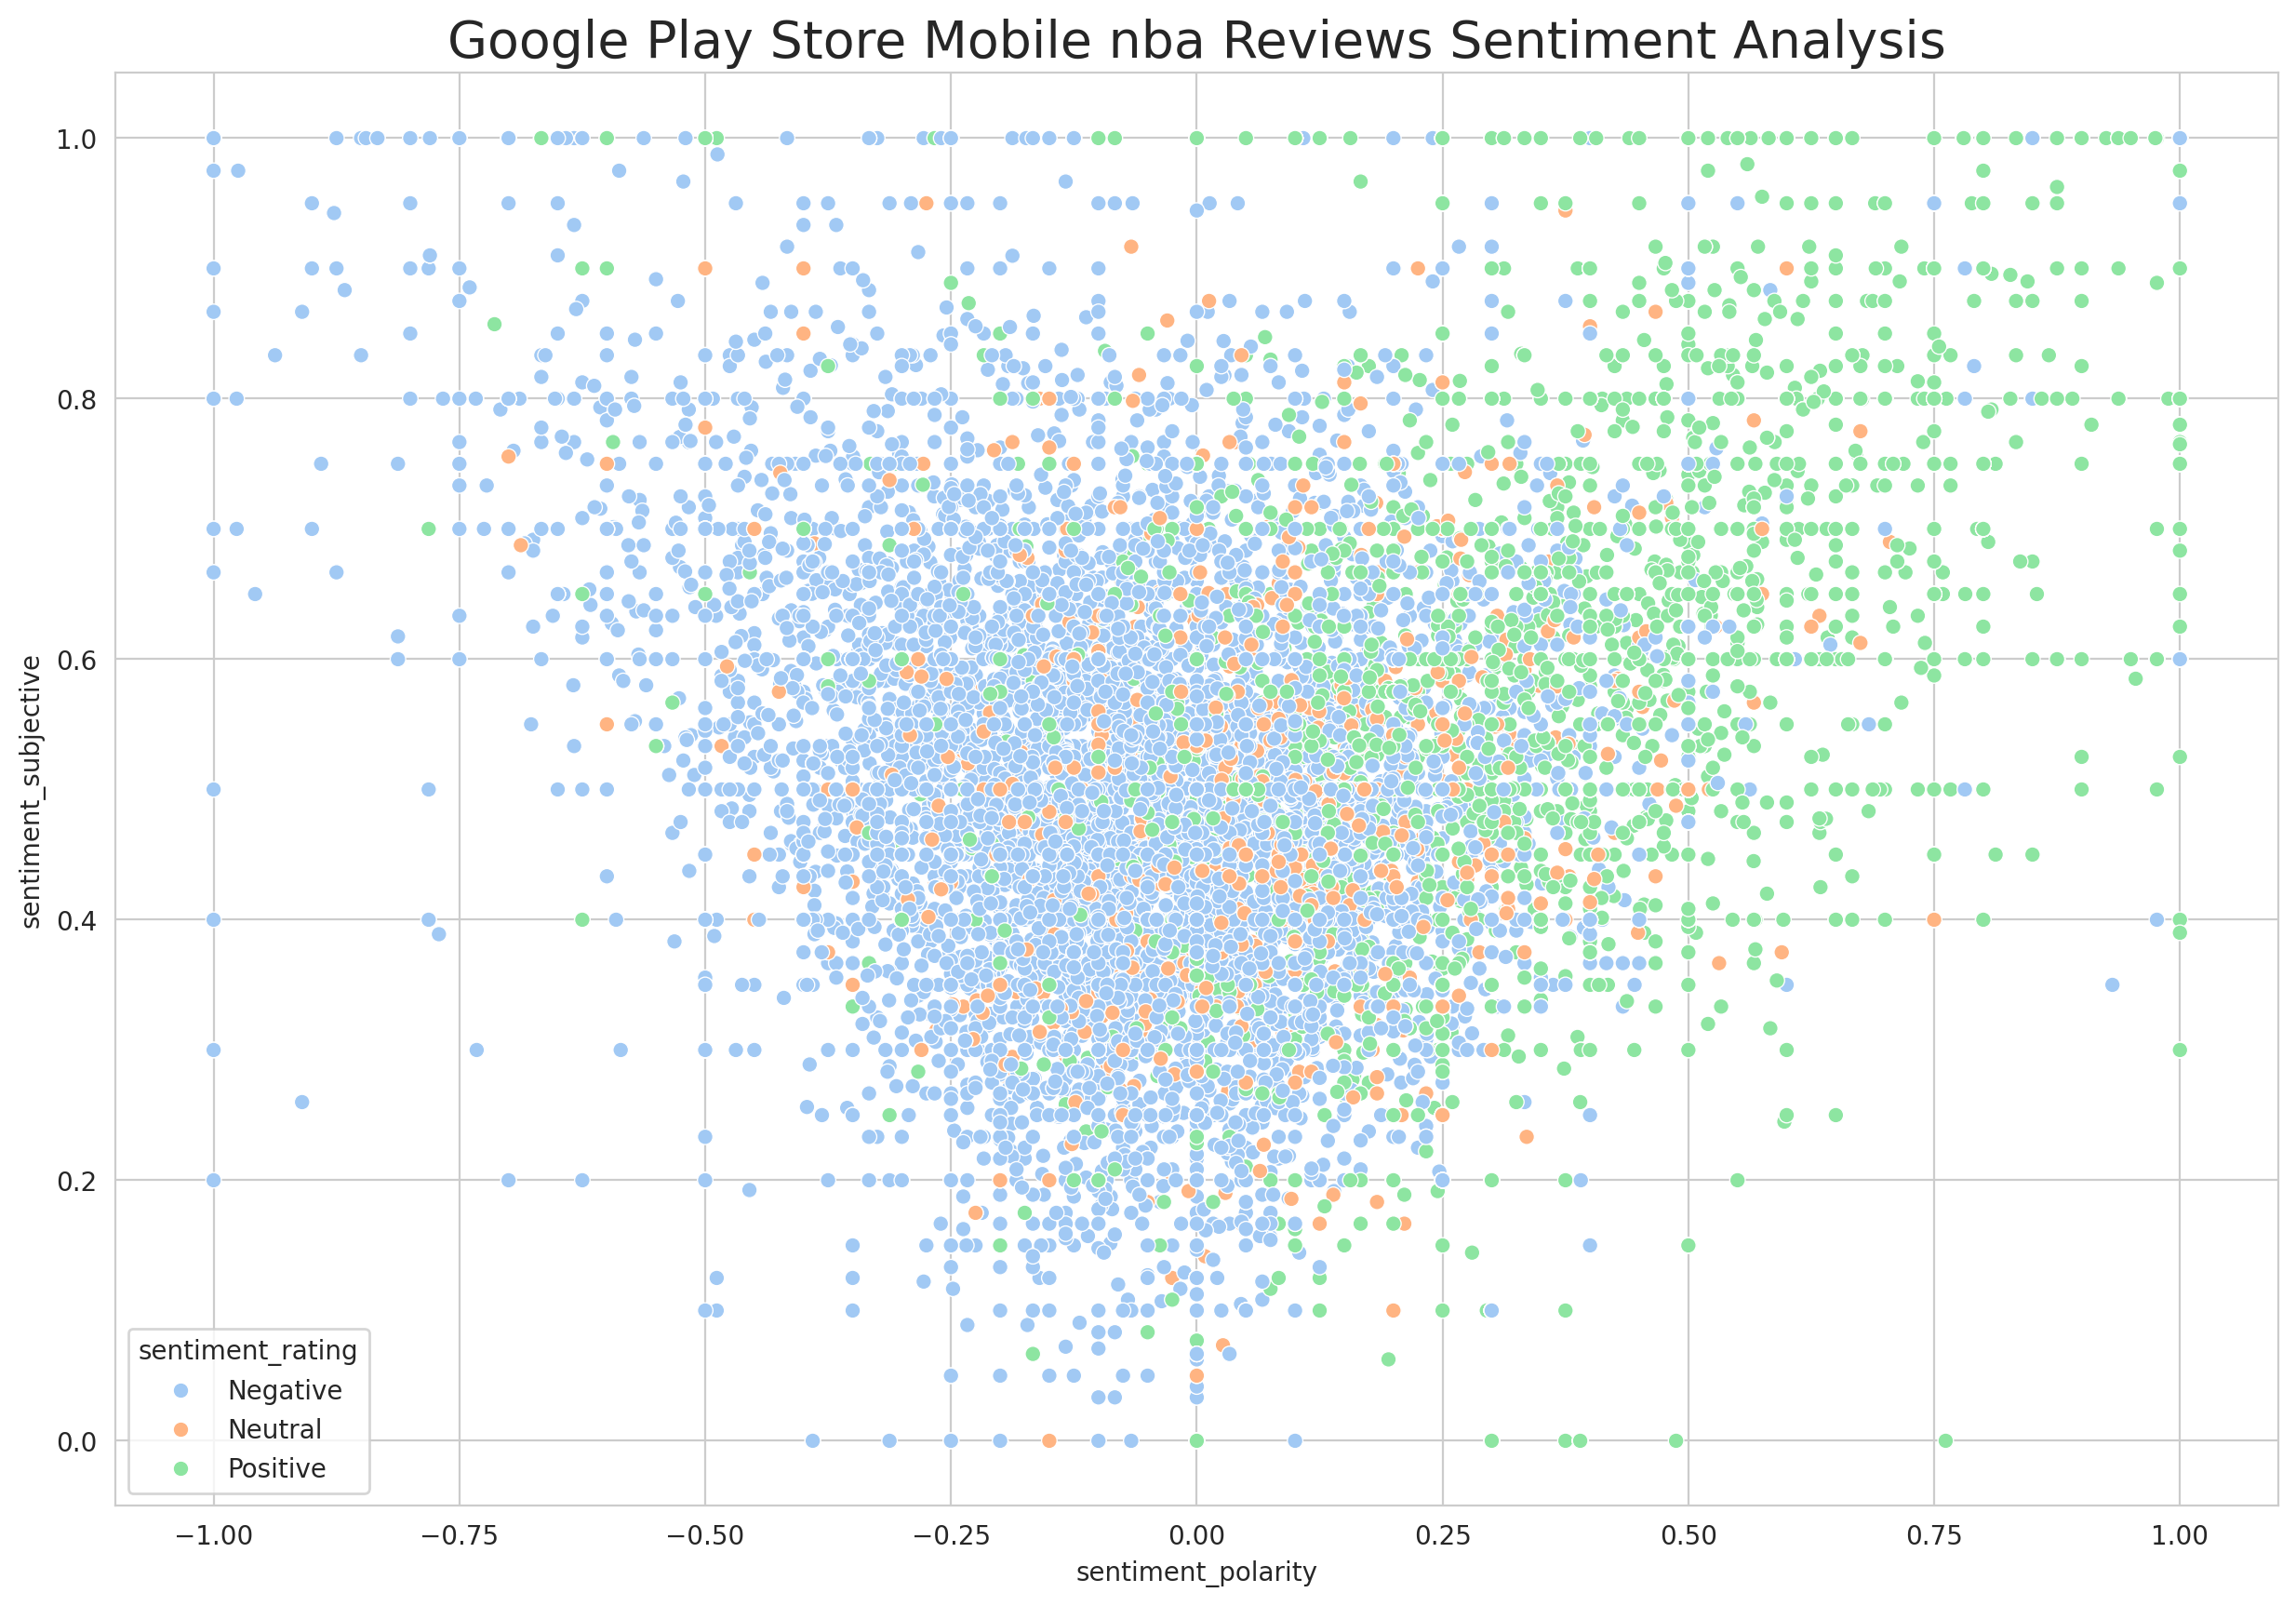

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
# Specify x and y using the 'x' and 'y' parameters within sns.scatterplot
sns.scatterplot(x=df_nbarev['sentiment_polarity'], y=df_nbarev['sentiment_subjective'],
                hue=df_nbarev['sentiment_rating'], edgecolor='white', palette="pastel")
plt.title("Google Play Store Mobile nba Reviews Sentiment Analysis", fontsize=20)
plt.show()

In [21]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

<ipython-input-21-6f9223a4813b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")


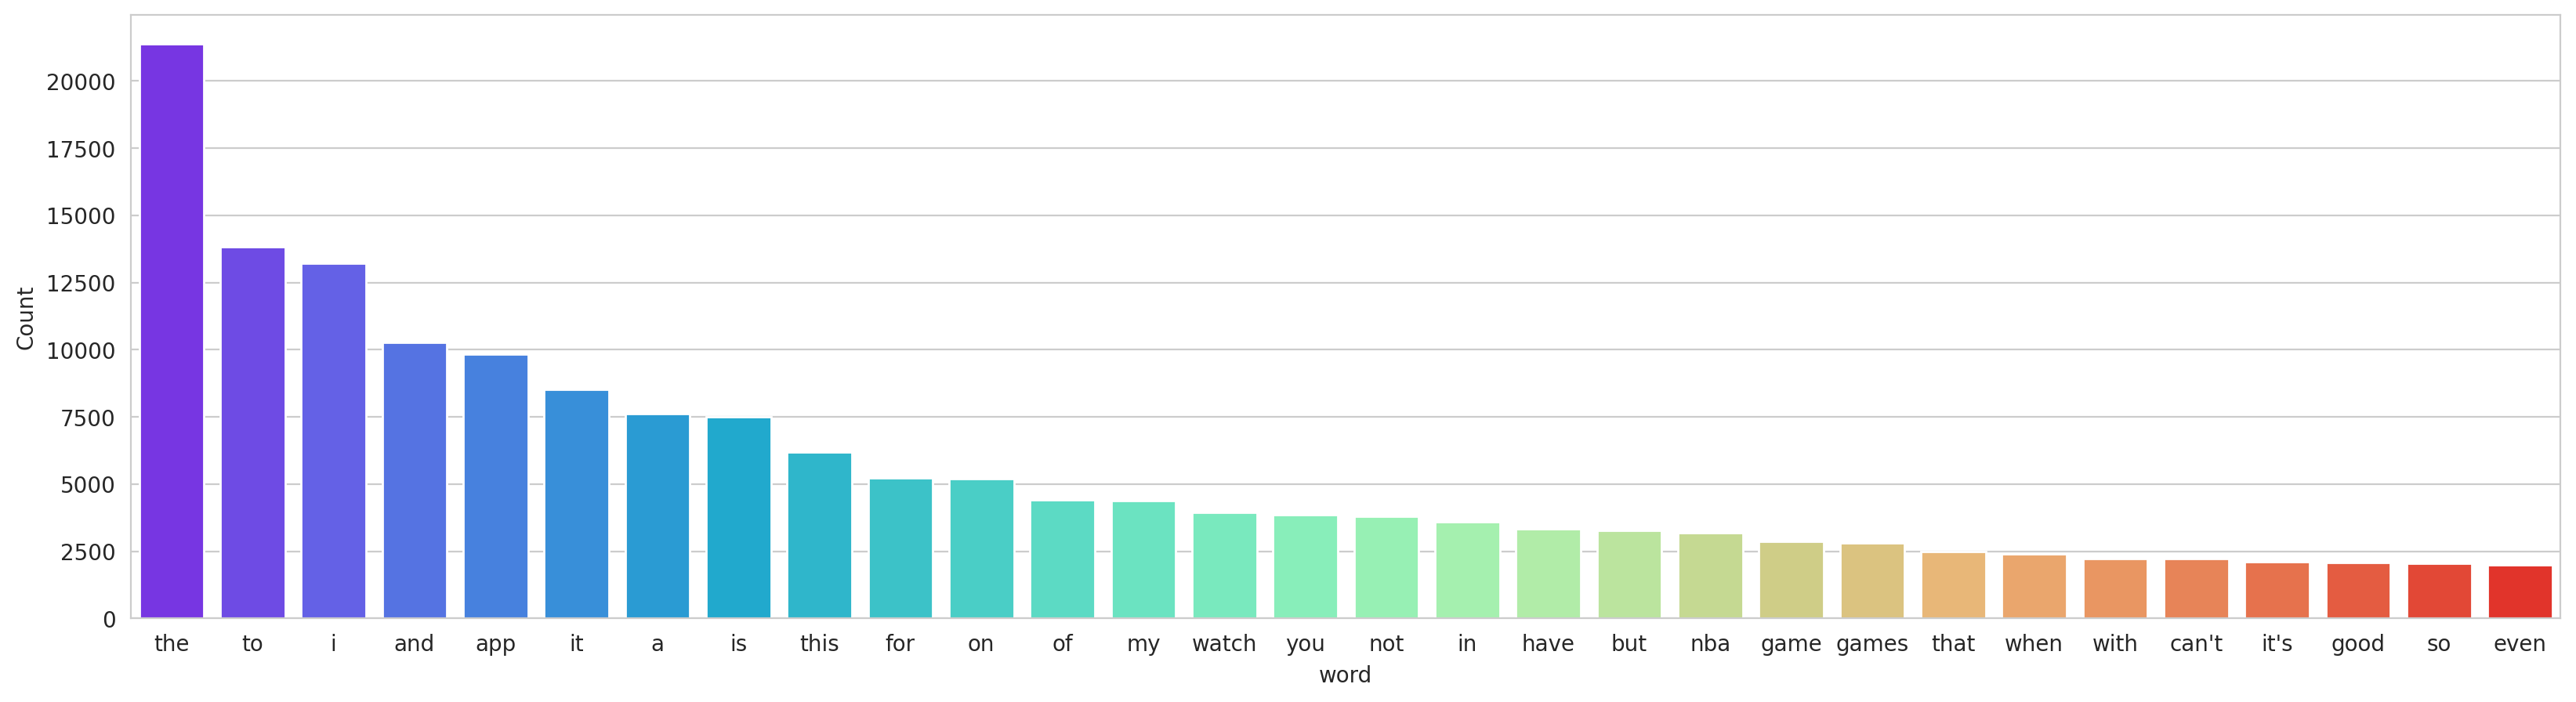

In [22]:
freq_words(df_nbarev['content'])

In [23]:
from nltk.corpus import stopwords

# Get English stopwords
english_stopwords = stopwords.words('english')

# Remove English stopwords from 'content' column
df_nbarev['content'] = df_nbarev['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))

In [24]:
# prompt: can you also apply English stopwords as well to the [content] column

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get English stopwords
english_stopwords = stopwords.words('english')

# Assuming df_nbarev is your DataFrame and 'content' is the column
df_nbarev['content'] = df_nbarev['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
df_nbarev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,press countine creating account said error,1,0.000000,0.000000,Negative
1,"video quality inconsistent usually bad, load video multiple times app locks up, audio work half time, takes forever load videos,sometimes starts games beginning, sometimes starts games live, takes...",1,-0.182576,0.333333,Negative
2,like new tablet optimizations expanding window full size work consistently incorrectly sized usually zoomed pixel tablet.,3,0.121591,0.376136,Neutral
3,coming back give another negative review. find hard believe rating app 2 star. app owners obviously add fake reviews prop total score. apps streaming quality bad crazy. could give less 1 star woul...,1,-0.314236,0.538542,Negative
4,nice,4,0.600000,1.000000,Positive
...,...,...,...,...,...
24044,"video awesome, unable log shows username field.",4,0.166667,0.833333,Positive
24045,"downloaded app onto huawei 7-inch table. went log onto nba account page could show fully, could see username box. hope fixed soon, season starting couple days!",3,0.033333,0.433333,Neutral
24046,purchased league pass / nba.tv already ive impatiently waiting app. got high hopes meet expectations later right misses mark. optimized xoom/tablets all. can't even see boxes login nba.tv account....,2,0.149143,0.495143,Negative
24047,can't wait season start!,5,0.000000,0.000000,Positive


In [26]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

<ipython-input-26-6f9223a4813b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")


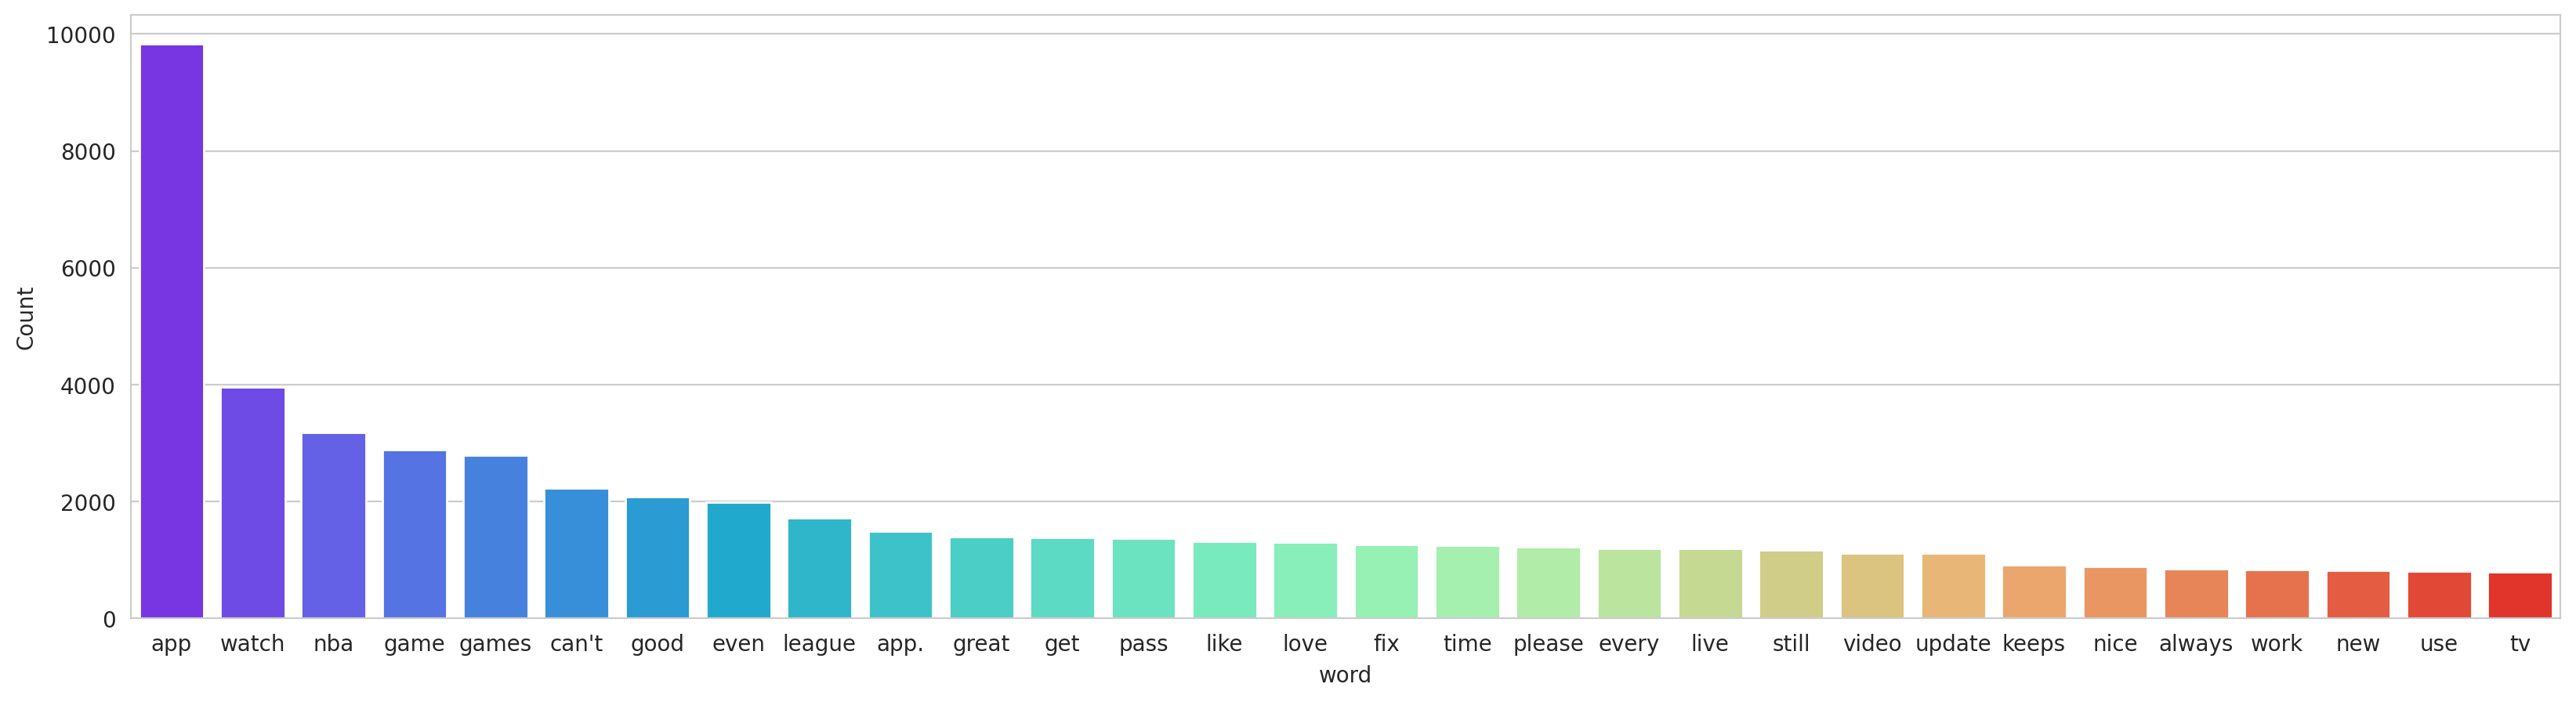

In [27]:
freq_words(df_nbarev['content'])

In [28]:
#Count after stopwords
#edited from https://www.tensorscience.com/nlp/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products
import string

# Create a copy of df_nbarev to avoid modifying the original DataFrame
df_nbarev_stopwords = df_nbarev.copy()

# Assuming 'content' is the original column and you want to store
# the processed text in 'review_after_stopwords'
df_nbarev_stopwords['review_after_stopwords'] = df_nbarev_stopwords['content']

df_nbarev_stopwords['wordCount'] = [len(review.split()) for review in df_nbarev_stopwords['content']]
df_nbarev_stopwords['wordCount_after_stopwords'] = [len(review.split()) for review in df_nbarev_stopwords['review_after_stopwords']] # Using the new column

In [29]:
display(df_nbarev_stopwords)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sentiment_polarity,sentiment_subjective,wordCount,uppercaseCharCount,specialCharCount,sentiment_rating,review_after_stopwords,wordCount_after_stopwords
0,0796ba82-e316-4727-ae96-09bea7f1c045,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,press countine creating account said error,1,0,0.59.0.20250214210937,2025-03-11 04:49:23,"We are sorry for the inconvenience and that you’re not having a good experience in the app, Ahsan! Thank you for bringing this issue to our attention. We would be happy to look into the issue furt...",2025-03-11 15:03:10,0.59.0.20250214210937,0.000000,0.000000,6,0,0,Negative,press countine creating account said error,6
1,67ee485e-d51a-44cd-94a4-401f883778fc,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"video quality inconsistent usually bad, load video multiple times app locks up, audio work half time, takes forever load videos,sometimes starts games beginning, sometimes starts games live, takes...",1,1,0.59.0,2025-03-11 04:25:48,"We are sorry you are having issues with the app, David. Kindly uninstall and reinstall the app then check for software updates in your device. If the issue persists, please visit support.watch.nba...",2025-03-11 15:04:20,0.59.0,-0.182576,0.333333,31,0,8,Negative,"video quality inconsistent usually bad, load video multiple times app locks up, audio work half time, takes forever load videos,sometimes starts games beginning, sometimes starts games live, takes...",31
2,bd7b7f73-8261-4652-8bb7-26e3de738690,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,like new tablet optimizations expanding window full size work consistently incorrectly sized usually zoomed pixel tablet.,3,0,0.59.0.20250214210937,2025-03-11 04:21:48,"We are sorry for the trouble and that you are not having a great experience in the app so far, Corey. We would be happy to look into the issue further if you would like to troubleshoot with us at ...",2025-03-11 01:13:25,0.59.0.20250214210937,0.121591,0.376136,16,0,1,Neutral,like new tablet optimizations expanding window full size work consistently incorrectly sized usually zoomed pixel tablet.,16
3,b25934b1-afd4-4c71-9df3-e69bb18cce3a,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,coming back give another negative review. find hard believe rating app 2 star. app owners obviously add fake reviews prop total score. apps streaming quality bad crazy. could give less 1 star woul...,1,5,0.59.0,2025-03-11 01:01:07,"We are really sorry the app is crashing, Eric. Please clear the cache for your app and ensure you have the latest version of the app by deleting and reinstalling the app. If your issue persists, p...",2023-02-03 01:18:23,0.59.0,-0.314236,0.538542,41,0,7,Negative,coming back give another negative review. find hard believe rating app 2 star. app owners obviously add fake reviews prop total score. apps streaming quality bad crazy. could give less 1 star woul...,41
4,e2cb25d3-30dc-4037-9e8c-4705d1ca65a5,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,nice,4,0,None,2025-03-11 00:37:20,"Thank you for the kind words and 5-star review, Steven! We appreciate the support and hope you continue to enjoy our app! Thanks, NBA Support.",2025-03-11 01:04:39,None,0.600000,1.000000,1,0,0,Positive,nice,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24044,cdd6b19c-718f-4f9e-a731-b992ebbfe594,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80

In [30]:
print(df_nbarev_stopwords[['content', 'wordCount']].head())
print(df_nbarev_stopwords[['review_after_stopwords', 'wordCount_after_stopwords']].head())

                                                                                                                                                                                                   content  \
0                                                                                                                                                               press countine creating account said error   
1  video quality inconsistent usually bad, load video multiple times app locks up, audio work half time, takes forever load videos,sometimes starts games beginning, sometimes starts games live, takes...   
2                                                                                like new tablet optimizations expanding window full size work consistently incorrectly sized usually zoomed pixel tablet.   
3  coming back give another negative review. find hard believe rating app 2 star. app owners obviously add fake reviews prop total score. apps streaming quality bad crazy. coul

## Homework TUGAS 1A

NLP Pipeline:
Tokenization
Lowering
Stopword Removal
Lemmatization
Stemming
Punctuations Removal
Expand Contractions
Spelling Correction
Rare Words Removal
Common Words Removal
